In [1]:
import tensorflow as tf

In [6]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [75]:
train_path = '/DL_lab/cifar-10-img/train'
test_path = '/DL_Lab/cifar-10-img/test'

train_batch, test_batch = 20000, 2000

data_gen = ImageDataGenerator(rescale=1.0/255)

train_ds= data_gen.flow_from_directory(
    train_path,
    batch_size= train_batch,
    target_size=(32,32),
    shuffle=True,
    class_mode='categorical'
)

test_ds = data_gen.flow_from_directory(
    test_path,
    batch_size= test_batch,
    target_size=(32,32),
    shuffle=True,
    class_mode='categorical'
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [76]:
x_train, y_train = train_ds[0]
x_test, y_test = test_ds[0]

In [77]:
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")

Shape of X_train (20000, 32, 32, 3)
Shape of y_train (20000, 10)
Shape of x_test  (2000, 32, 32, 3)
Shape of y_test  (2000, 10)


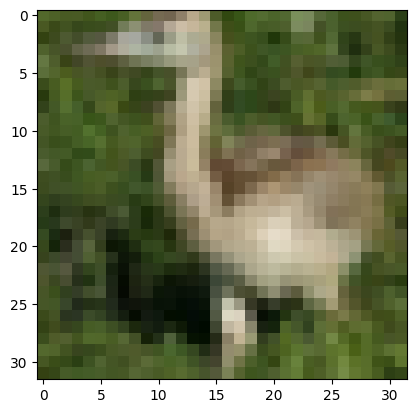

In [78]:
plt.imshow(x_train[54])

In [38]:
from tensorflow.keras.layers import MaxPooling2D

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3), strides=(1,1)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu', strides=(2,2)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', strides=(2,2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [43]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit( x_train, y_train, epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 54ms/step - accuracy: 0.1591 - loss: 2.2170 - val_accuracy: 0.2815 - val_loss: 1.9215
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.3083 - loss: 1.8767 - val_accuracy: 0.3615 - val_loss: 1.7290
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.3823 - loss: 1.6903 - val_accuracy: 0.4350 - val_loss: 1.5417
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.4225 - loss: 1.5799 - val_accuracy: 0.4610 - val_loss: 1.4667
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.4550 - loss: 1.5086 - val_accuracy: 0.4885 - val_loss: 1.3994


<Axes: >

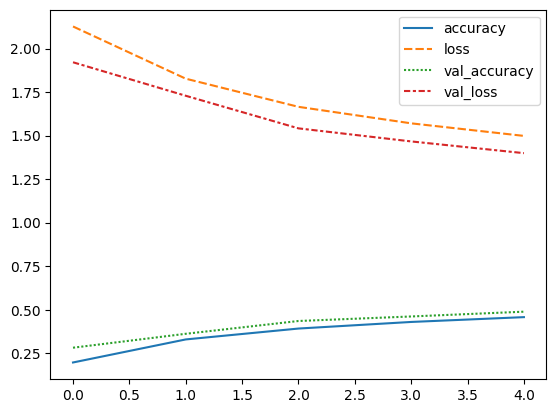

In [48]:
import seaborn as sns
sns.lineplot(model.history.history)

In [49]:
test_acc, test_loss = model.evaluate(x_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4949 - loss: 1.3733


In [53]:
prediction = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


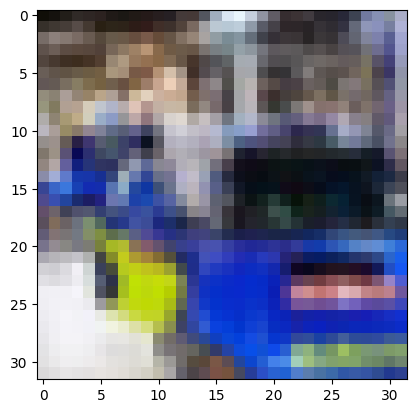

Truth: automobile
Predict:  deer


In [90]:
import numpy as np
import matplotlib.pyplot as plt 

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

n=599
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()
print("Truth:" ,class_names[np.
      argmax(y_test[n], axis=0)])
print("Predict: ", class_names[np.argmax(predicted_value[n], axis=0)])
